In [1]:
## Ejercicio 1: Preparación del ambiente de trabajo
# Imporatamos la triada clásica 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# seaborn
import seaborn as sns
#statsmodels para modelación
import statsmodels.api as sm
import statsmodels.formula.api as smf
#Importe LogisticRegression, train_test_split, 
#StandardScaler, classification_report y roc_curve de sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
#Gráficos estilo seaborn
plt.style.use('seaborn')

In [4]:
## Ejercicio 2: Análisis exploratorio
#Leer el csv
df=pd.read_csv('default_credit.csv')
df=df.drop("index", axis=1)

In [6]:
df.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


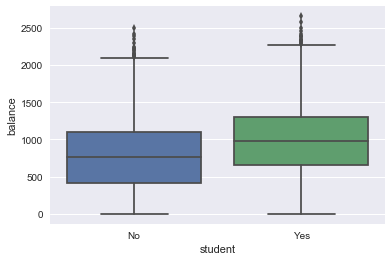

In [8]:
#Un boxplot del balance total de las cuentas, segmentado por el status de estudiante.
boxplot_01= sns.boxplot(x=df['student'], y=df['balance'], data=df)

In [12]:
#Los estudiantes están más endeudados.

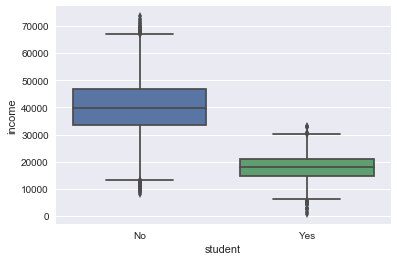

In [9]:
#Un boxplot del ingreso total de cada cliente, segmentado por el status de estudiante.
boxplot_02= sns.boxplot(x=df['student'], y=df['income'], data=df)

In [11]:
#El ingreso promedio declarado por los estudiantes es menor que el que no es estudiante.
#Los estdiantes registran valores similares.

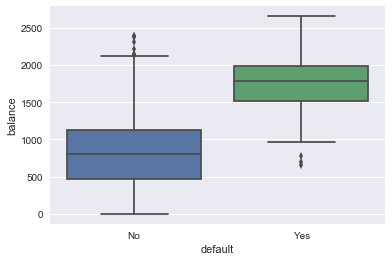

In [10]:
#Un boxplot del balance total de las cuentas, segmentado por el status de default.
boxplot_03= sns.boxplot(x=df['default'], y=df['balance'], data=df)

In [13]:
#Quien lleva sus cuentas al dia su saldo pendiente es menor a los morosos. A lo más 1.000 usd aprox

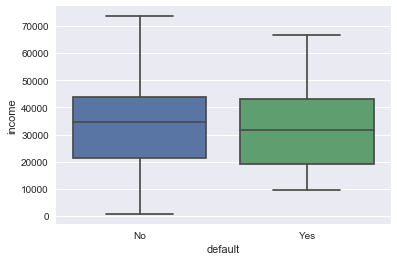

In [14]:
#Un boxplot del ingreso total de cada cliente, segmentado por el status de default.
boxplot_04= sns.boxplot(x=df['default'], y=df['income'], data=df)

In [15]:
#El nivel de ingreso no tiene mucho que ver si es moroso o no ya que tienen un promedio similar. 
#También el q1 y q3 son similares.

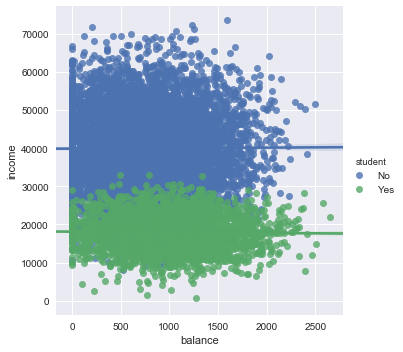

In [16]:
#Un diagrama de dispersión entre `balance` e `income`, segmentado por el status de estudiante.
sns.lmplot('balance', 'income', data=df, hue='student') 

In [17]:
#El estudiante recibe menos ingresos que el trabajador pero a nivel de saldo de deuda son similares.

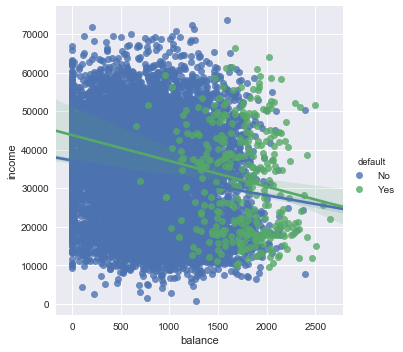

In [18]:
#Un diagrama de dispersión entre `balance` e `income`, segmentado por el status de default.
sns.lmplot('balance', 'income', data=df, hue='default') 

In [19]:
#Los morosos o no reciben un rango de nivel de ingreso similar. Los morosos registran un mayor nivel 
#de saldo en su deuda

In [20]:
### Ejercicio 3: Modelación econométrica

In [102]:
df['default']=df['default'].replace(['No', 'Yes'], [0,1])
df['student']=df['student'].replace(['No', 'Yes'], [0,1])

In [101]:
df.describe()


,default,student,balance,income
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.033300,0.294400,835.374886,33516.981876
std,0.179428,0.455795,483.714985,13336.639563
min,0.000000,0.000000,0.000000,771.967729
25%,0.000000,0.000000,481.731105,21340.462903
50%,0.000000,0.000000,823.636973,34552.644802
75%,0.000000,1.000000,1166.308386,43807.729272
max,1.000000,1.000000,2654.322576,73554.233495


In [99]:
moroso_logit = smf.logit('default ~ balance+income+student', df).fit()

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10


In [32]:
moroso_logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Sat, 29 Sep 2018   Pseudo R-squ.:                  0.4619
Time:                        13:04:47   Log-Likelihood:                -785.77
converged:                       True   LL-Null:                       -1460.3
                                        LLR p-value:                3.257e-292
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.8690      0.492    -22.079      0.000     -11.834      -9.904
balance        0.0057      0.000     24.737      0.000       0.005       0.006
income      3.033e-06    8.2e-06      0.370      0.712    -1.3e-05    1.91e-05
student       -0.6468      0.236     -2.738      0.006      -1.110      -0.184
==============================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [33]:
moroso_logit_02 = smf.logit('default ~ income+student', df).fit()

Optimization terminated successfully.
         Current function value: 0.145375
         Iterations 8


In [34]:
moroso_logit_02.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Sat, 29 Sep 2018   Pseudo R-squ.:                0.004504
Time:                        13:12:06   Log-Likelihood:                -1453.7
converged:                       True   LL-Null:                       -1460.3
                                        LLR p-value:                  0.001392
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.7971      0.280    -13.547      0.000      -4.347      -3.248
income      7.261e-06   6.66e-06      1.089      0.276    -5.8e-06    2.03e-05
student        0.5671      0.190      2.991      0.003       0.196       0.939
==============================================================================
"""

In [31]:
#Se sacó el balance porque el p al ser tan pequeño tenía poco efecto en ser moroso o no.

In [146]:
### Ejercicio 4: Entrenar
df2= df.loc[:,['income', 'student']]
df2.head()

,income,student
0,44361.625074,0
1,12106.134700,1
2,31767.138947,0
3,35704.493935,0
4,38463.495879,0


In [147]:
X_train, X_test, y_train, y_test = train_test_split(df2,
                                                   df['default'],
                                                   test_size=.33,
                                                   random_state=15906)

In [140]:
clear

In [148]:
X_train_std = StandardScaler().fit_transform(X_train)
X_test_std = StandardScaler().fit_transform(X_test)
default_model_std = LogisticRegression().fit(X_train_std, y_train)
yhat_std =default_model_std.predict_proba(X_test_std)[:,1]

default_model_std.coef_

array([[0.05026931, 0.22509433]])

In [149]:
yhat_std

array([0.02868374, 0.02874689, 0.027961  , ..., 0.02775505, 0.02936871,
       0.02800533])

In [150]:
false_positive, true_positive, threshold = roc_curve(y_test, yhat_std)

Text(0.5,0,'Falsos Positivos')

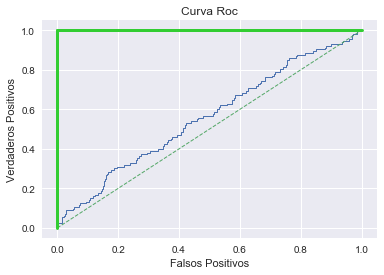

In [151]:
plt.title('Curva Roc')
plt.plot(false_positive, true_positive, lw=1)
plt.plot([0,1], ls="--", lw=1)
plt.plot([0,0], [1,0], c='limegreen', lw=3), plt.plot([1,1], c='limegreen', lw=3)
plt.ylabel('Verdaderos Positivos')
plt.xlabel('Falsos Positivos')

In [145]:
#Tiene una capacidad predictiva suficiente ya que la curva está sobre la bisectriz, sin embargo, no
#es la mejor porque no se ve una gran tendencia a acercarse a la esquina superiro izquierda.